In [22]:
#importar bibliotecas para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#comandos para crear funciones que permiten la "limpieza de los datos", en este caso separadores de decimales con comas
def CCleanData(x):
    x=x.replace(',','.')
    x=x.replace(' ','')
    try: 
        x=round(float(x), 3)
    except:
        x=0
    
    return x

#importar datos
myData=pd.read_csv(r"C:\Users\lmila\OneDrive\Documentos\MAESTRIA\INFORMATICA\predios_csv_1221.csv", on_bad_lines='skip', delimiter=';',
converters={
    'PreAConst':CCleanData, 
    'PreATerre':CCleanData, 
    }, 
nrows=1000)

In [24]:
#3. Mostrar el encabezado de los datos
print(myData.head())

#3A. muestra una columna especifica
print(myData['PreAConst'])
#3B. Muestra una fila especifica
#iloc: search by row`s index
#loc: search by row`s label
row=myData.iloc[1]
print(row)
#iloc return a serie, an unidimensional array whose rows are labeled with the name of each column
#print (isinstance(row, pd.Series))

   OBJECTID  PreCBarrio    PreNBarrio  PreCManz  PreCPredio  PreCCons  \
0         1      205401  EL CHANCO II        29          25         0   
1         2      205401  EL CHANCO II        29          25         0   
2         3      205401  EL CHANCO II        29          25         0   
3         4      205401  EL CHANCO II        29          25         0   
4         5      205401  EL CHANCO II        29          25         0   

   PreCResto      PreChip          PreCedCata                        PreNupre  \
0          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   
1          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   
2          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   
3          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   
4          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   

   ...  PreBMobili PreBCons PreCTamano PreCEnchap PreCMobili PreCConse  \


In [25]:
#4. Dimension of the dataframe
print(myData.shape)

(1000, 52)


In [26]:
#5. Information about the columns of the dataframe

print(myData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    1000 non-null   int64  
 1   PreCBarrio  1000 non-null   int64  
 2   PreNBarrio  1000 non-null   object 
 3   PreCManz    1000 non-null   int64  
 4   PreCPredio  1000 non-null   int64  
 5   PreCCons    1000 non-null   int64  
 6   PreCResto   1000 non-null   int64  
 7   PreChip     1000 non-null   object 
 8   PreCedCata  1000 non-null   object 
 9   PreNupre    1000 non-null   object 
 10  PreTProp    1000 non-null   int64  
 11  PreFIncorp  1000 non-null   object 
 12  PreClase    1000 non-null   object 
 13  PreDirecc   1000 non-null   object 
 14  PreMDirecc  1000 non-null   object 
 15  PreTDirecc  127 non-null    object 
 16  PreDSI      127 non-null    object 
 17  PreATerre   1000 non-null   float64
 18  PreAConst   1000 non-null   float64
 19  PreCZHF     1000 non-null   

In [27]:
#6. Statistics

print(myData.describe())

#6.A. Statitics of a numeric column
print(myData['PreAConst'].describe())
#6.B. Specific statistics
print(myData['PreAConst'].median())
# Variance: The expectation of the squared deviation of a random variable from its population mean or sample mean. 
# Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their 
# average value. 
print(myData['PreAConst'].var())

          OBJECTID     PreCBarrio     PreCManz   PreCPredio     PreCCons  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000   73758.257000    17.672000    13.390000     3.693000   
std     288.819436   96434.442546    18.486648    15.611778     6.990538   
min       1.000000     240.000000     1.000000     0.000000     0.000000   
25%     250.750000    1101.000000     5.000000     1.000000     0.000000   
50%     500.500000    8415.000000     9.000000     8.000000     1.000000   
75%     750.250000  208107.000000    29.000000    20.000000     2.000000   
max    1000.000000  208128.000000    85.000000    82.000000    41.000000   

          PreCResto     PreTProp     PreATerre   PreAConst   PreCDestin  ...  \
count   1000.000000  1000.000000   1000.000000  1000.00000  1000.000000  ...   
mean   11496.290000     5.969000    381.105400   196.75842     9.599000  ...   
std    28140.635121     0.371722   1955.333703   593.23308    19.176286  ..

<AxesSubplot:>

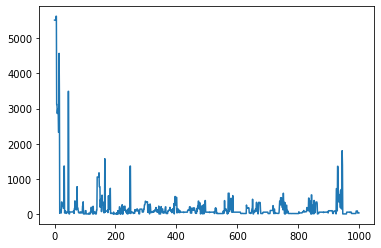

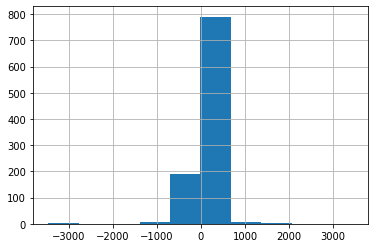

In [28]:
#7. graficas

plt.figure()
myData['PreAConst'].plot()
plt.figure()
myData['PreAConst'].diff().hist()


ModuleNotFoundError: No module named 'scipy'

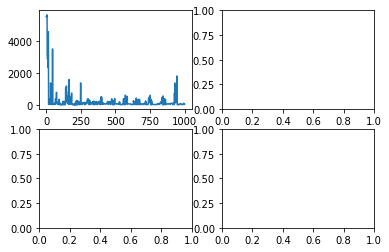

In [29]:
#7.A Subplots
#To create a figure and a matrix of axes

fig, axes = plt.subplots(nrows=2, ncols=2)
myData['PreAConst'].plot(ax=axes[0,0])
compositeFigure=myData['PreAConst'].plot(kind='density', ax=axes[0,1])
compositeFigure.axvline(myData['PreAConst'].mean(), color="red")
compositeFigure.axvline(myData['PreAConst'].median(), color="#00FF00")

myData['PreAConst'].plot(kind='box', ax=axes[1,0], vert=False)
myData.plot.scatter(x='PreAConst', y='OBJECTID',ax=axes[1,1])
plt.show()


myData[['PreAFachad','PreACubier', 'PreAPisos', 'PrePuntaje']].plot(kind='box', subplots=True, layout=(2,2))
plt.show()



In [ ]:
#8. Categorical analysis
print(myData['PreNBarrio'].value_counts())
'''
plt.figure()
myData['PreNBarrio'].value_counts().plot(kind='pie')
plt.figure()
myData['PreNBarrio'].value_counts().plot(kind='bar', ylabel='Cantidad de Predios')
plt.show()
'''

LAS BRISAS                          341
SANTA BARBARA CENTRAL               284
SAN LUIS ALTOS DEL CABO RURAL II    166
SAN ISIDRO RURAL II                  64
LA ESPERANZA                         60
SANTA ANA OCCIDENTAL                 33
EL CHANCO II                         17
PARAMO IV                            17
TORCA II                             14
CREADO PARA CARGUE DE PREDIOS         2
PARAMO RURAL V                        2
Name: PreNBarrio, dtype: int64


"\nplt.figure()\nmyData['PreNBarrio'].value_counts().plot(kind='pie')\nplt.figure()\nmyData['PreNBarrio'].value_counts().plot(kind='bar', ylabel='Cantidad de Predios')\nplt.show()\n"

            OBJECTID  PreCBarrio  PreCManz  PreCPredio  PreCCons  PreCResto  PreTProp  PreATerre  PreAConst  PreCDestin  PreVetustz  PreVForma  PreVActual   PreCUso  PrePuntaje  PreEArmaz  PreEMuros  PreECubier  PreECons  PreAFachad  PreACubier  PreAPisos  PreACons  PreBTamano  PreBEnchap  PreBMobili  PreBCons  PreCTamano  PreCEnchap  PreCMobili  PreCConse  PreCIndus  PreACercha  Barmanpre
OBJECTID    1.000000   -0.055762  0.140216   -0.321655  0.146803   0.093793  0.081597  -0.047015  -0.228548   -0.181218    0.151502  -0.019478         NaN  0.054176   -0.140354   0.156483  -0.126340    0.021583  0.058551   -0.030284   -0.104085   0.046071 -0.049151    0.228567    0.209032    0.047985  0.209831    0.214286    0.222213    0.230102   0.235272  -0.190827   -0.077060  -0.055762
PreCBarrio -0.055762    1.000000  0.490820    0.147133 -0.373885  -0.278797  0.062116   0.143200   0.223566    0.291444    0.336113   0.599775         NaN -0.668363   -0.393868  -0.596842   0.056209   -0.530817 -0.

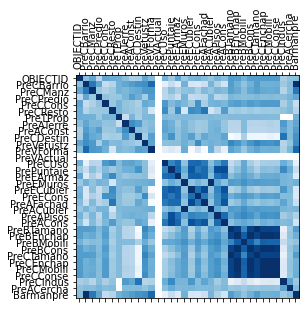

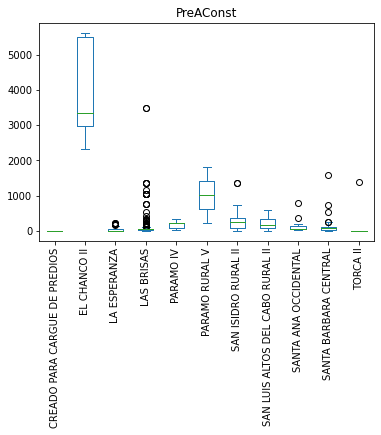

                PreNBarrio  PreAConst
0             EL CHANCO II     5517.3
1             EL CHANCO II     5517.3
2             EL CHANCO II     5517.3
3             EL CHANCO II     5517.3
4             EL CHANCO II     5517.3
..                     ...        ...
995  SANTA BARBARA CENTRAL       25.2
996  SANTA BARBARA CENTRAL       25.0
997  SANTA BARBARA CENTRAL       29.2
998  SANTA BARBARA CENTRAL       26.5
999  SANTA BARBARA CENTRAL       28.5

[1000 rows x 2 columns]


In [ ]:
#9. Correlation
corr=myData.corr()
#Data
print(corr.to_string())
#Graphical depiction

myMatrixGraph=plt.figure()
plt.matshow(corr, myMatrixGraph.number, cmap='Blues')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


boxData=myData[['PreNBarrio','PreAConst']]
boxData.plot(by='PreNBarrio', kind='box')
plt.xticks(rotation='vertical')
plt.show()
print(boxData)



0.6738275525158769
0.6738275525158769
0.6738275525158769
0.6738275525158769
0.6738275525158769
0.8932396825396826
0.8932396825396826
1.0985185185185187
1.0985185185185187
1.0587777777777778
1.0252182012626352
1.0252182012626352
1.0252182012626352
0.9293082766893243
0.9293082766893243
0.9903137730779232
0.9121186601830974
0.2893835616438356
0.905982905982906
1.9386064030131827
0.45055555555555554
0.45055555555555554
0.29988974641675853
1.2798718431963814
1.2798718431963814
0.0
0.0
0.0
0.0
0.0
0.0
0.7235122210414453
0.7235122210414453
0.16938110749185667
0.5320381731424676
1.0
0.4729631864815933
0.9751104565537554
1.0
1.9612021857923496
1.759447004608295
0.9742222222222223
1.0
0.978140703517588
1.0
0.8627305543193394
0.8627305543193394
0.1482321899736148
0.0
0.0
1.0733801717408273
1.0777973740936704
1.0867417506421655
1.095617529880478
1.1048613901165125
1.109318273497378
1.1187957689178194
1.1187957689178194
1.1235955056179774
1.1235955056179774
1.1282051282051282
1.1282051282051282
9.5

ModuleNotFoundError: No module named 'scipy'

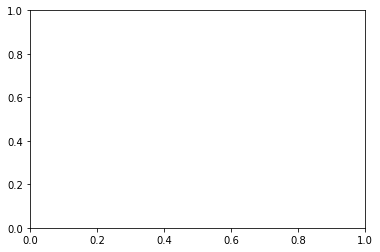

In [30]:
#10. Add columns to dataframe
#Using numpy`s where function: where(condition, [x, y]), return elements chosen from x or y depending on condition.
myData['PreBuildPercent']= np.where(myData['PreATerre']!=0, myData['PreAConst']/myData['PreATerre'], 0)
#Using lambda functions
myData['PreBuildPercent']= myData.apply(lambda x: x.PreAConst/x.PreATerre if x.PreATerre!=0 else 0, axis=1)
#Using direct operation
myData['PreBuildPercent']= myData['PreAConst']/myData['PreATerre']
#Using custom function

def myFunc(x):
    if x.PreATerre!=0:
        return x.PreAConst/x.PreATerre
    else:
        return 0
myData['PreBuildPercent']= myData.apply(myFunc, axis=1)
for x in myData['PreBuildPercent']:
    print(x)
myData['PreBuildPercent'].plot(kind='density')
plt.show()


In [ ]:
#11. Modify the values of an entire column 
myData['PreBuildPercent']*=1.2


In [ ]:
#12. Select the rows that meet some criteria
# loc selects rows and columns using labels, iloc selects rows and columns using integer positions
#rows that meet some criteria and all columns
fdata=myData.loc[myData['PreNBarrio']=='LA ESPERANZA']
print(fdata)

fdata=myData.loc[(myData['PreNBarrio']=='LA ESPERANZA') | (myData['PreNBarrio']=='PARAMO IV')]
print(fdata)

#Rows that meet some criteria and only some columns
fdata=myData.loc[myData['PreNBarrio']=='LA ESPERANZA', 'PreCBarrio']
print(fdata)

fdata=myData.loc[myData['PreNBarrio']=='LA ESPERANZA', ['PreCBarrio', 'PreCManz']]
print(fdata)

#Select all rows of one column
fdata=myData.loc[:,'PreNBarrio']
print(fdata)

#Select all rows of one column and all columns behind it
fdata=myData.loc[:,:'PreNBarrio']
print(fdata)

#Select all rows of two columns
fdata=myData.loc[:,['PreNBarrio', 'OBJECTID']]
print(fdata)

#Select all rows behind some label of two columns
fdata=myData.loc[:20,['PreNBarrio', 'OBJECTID']]
print(fdata)


     OBJECTID  PreCBarrio    PreNBarrio  PreCManz  PreCPredio  PreCCons  \
95         96      208107  LA ESPERANZA        10          29         0   
96         97      208107  LA ESPERANZA        45          21         0   
97         98      208107  LA ESPERANZA        45          22         0   
98         99      208107  LA ESPERANZA        46           1         0   
99        100      208107  LA ESPERANZA        46           6         0   
100       101      208107  LA ESPERANZA        46           8         0   
101       102      208107  LA ESPERANZA         4           1         0   
102       103      208107  LA ESPERANZA         4           1         0   
103       104      208107  LA ESPERANZA         4           1         1   
104       105      208107  LA ESPERANZA         4          10         0   
105       106      208107  LA ESPERANZA         4          13         0   
106       107      208107  LA ESPERANZA        46          10         0   
107       108      208107